EXPLORATORY DATA ANALYSIS

1. Data cleaning and inspecting.
2. Finding correlations and data visualization
3. Tell a story

used data from 
https://www.kaggle.com/yamqwe/world-happiness-report-2019e

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv(r"D:\WORK\Python\world-happiness-report-2019.csv")
print("(rows,columns)")
df.shape


(rows,columns)


(156, 11)

In [33]:
df.head

<bound method NDFrame.head of              Country (region)  Ladder  SD of Ladder  Positive affect  \
0                     Finland       1             4             41.0   
1                     Denmark       2            13             24.0   
2                      Norway       3             8             16.0   
3                     Iceland       4             9              3.0   
4                 Netherlands       5             1             12.0   
..                        ...     ...           ...              ...   
151                    Rwanda     152            63             54.0   
152                  Tanzania     153           122             78.0   
153               Afghanistan     154            25            152.0   
154  Central African Republic     155           117            132.0   
155               South Sudan     156           140            127.0   

     Negative affect  Social support  Freedom  Corruption  Generosity  \
0               10.0            

In [34]:
##df.set_index('Country (region)')
df.columns

Index(['Country (region)', 'Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy\r'],
      dtype='object')

In [35]:
df.dtypes

Country (region)               object
Ladder                          int64
SD of Ladder                    int64
Positive affect               float64
Negative affect               float64
Social support                float64
Freedom                       float64
Corruption                    float64
Generosity                    float64
Log of GDP\nper capita        float64
Healthy life\nexpectancy\r    float64
dtype: object

1. Data Cleaning and finding null values


In [36]:
print("Columns with null values")
print(df.columns[df.isnull().any()].tolist())

Columns with null values
['Positive affect', 'Negative affect', 'Social support', 'Freedom', 'Corruption', 'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy\r']


In [37]:
print("Missing Value Count - "+ str(len(df))+ " rows")
print("Generosity: "+ str(df['Generosity'].isna().sum))
print("Log of GDP/per capita - "+ str(df['Log of GDP\nper capita'].isna().sum))


Missing Value Count - 156 rows
Generosity: <bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Name: Generosity, Length: 156, dtype: bool>
Log of GDP/per capita - <bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Name: Log of GDP\nper capita, Length: 156, dtype: bool>


Removing Null values

In [38]:
data_frame = df.dropna()

In [39]:
data_frame.isnull().sum()

Country (region)              0
Ladder                        0
SD of Ladder                  0
Positive affect               0
Negative affect               0
Social support                0
Freedom                       0
Corruption                    0
Generosity                    0
Log of GDP\nper capita        0
Healthy life\nexpectancy\r    0
dtype: int64

In [40]:
data_frame.shape

(140, 11)

Before: 156 rows
 VS After: 140 rows

In [41]:
data_frame.info

<bound method DataFrame.info of              Country (region)  Ladder  SD of Ladder  Positive affect  \
0                     Finland       1             4             41.0   
1                     Denmark       2            13             24.0   
2                      Norway       3             8             16.0   
3                     Iceland       4             9              3.0   
4                 Netherlands       5             1             12.0   
..                        ...     ...           ...              ...   
151                    Rwanda     152            63             54.0   
152                  Tanzania     153           122             78.0   
153               Afghanistan     154            25            152.0   
154  Central African Republic     155           117            132.0   
155               South Sudan     156           140            127.0   

     Negative affect  Social support  Freedom  Corruption  Generosity  \
0               10.0          

D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


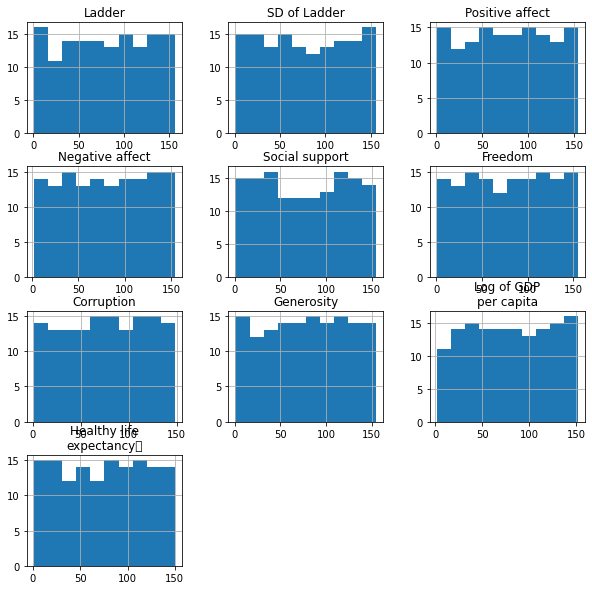

In [42]:
hist = data_frame.hist(figsize = (10,10))

D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<function matplotlib.pyplot.show(close=None, block=None)>

D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


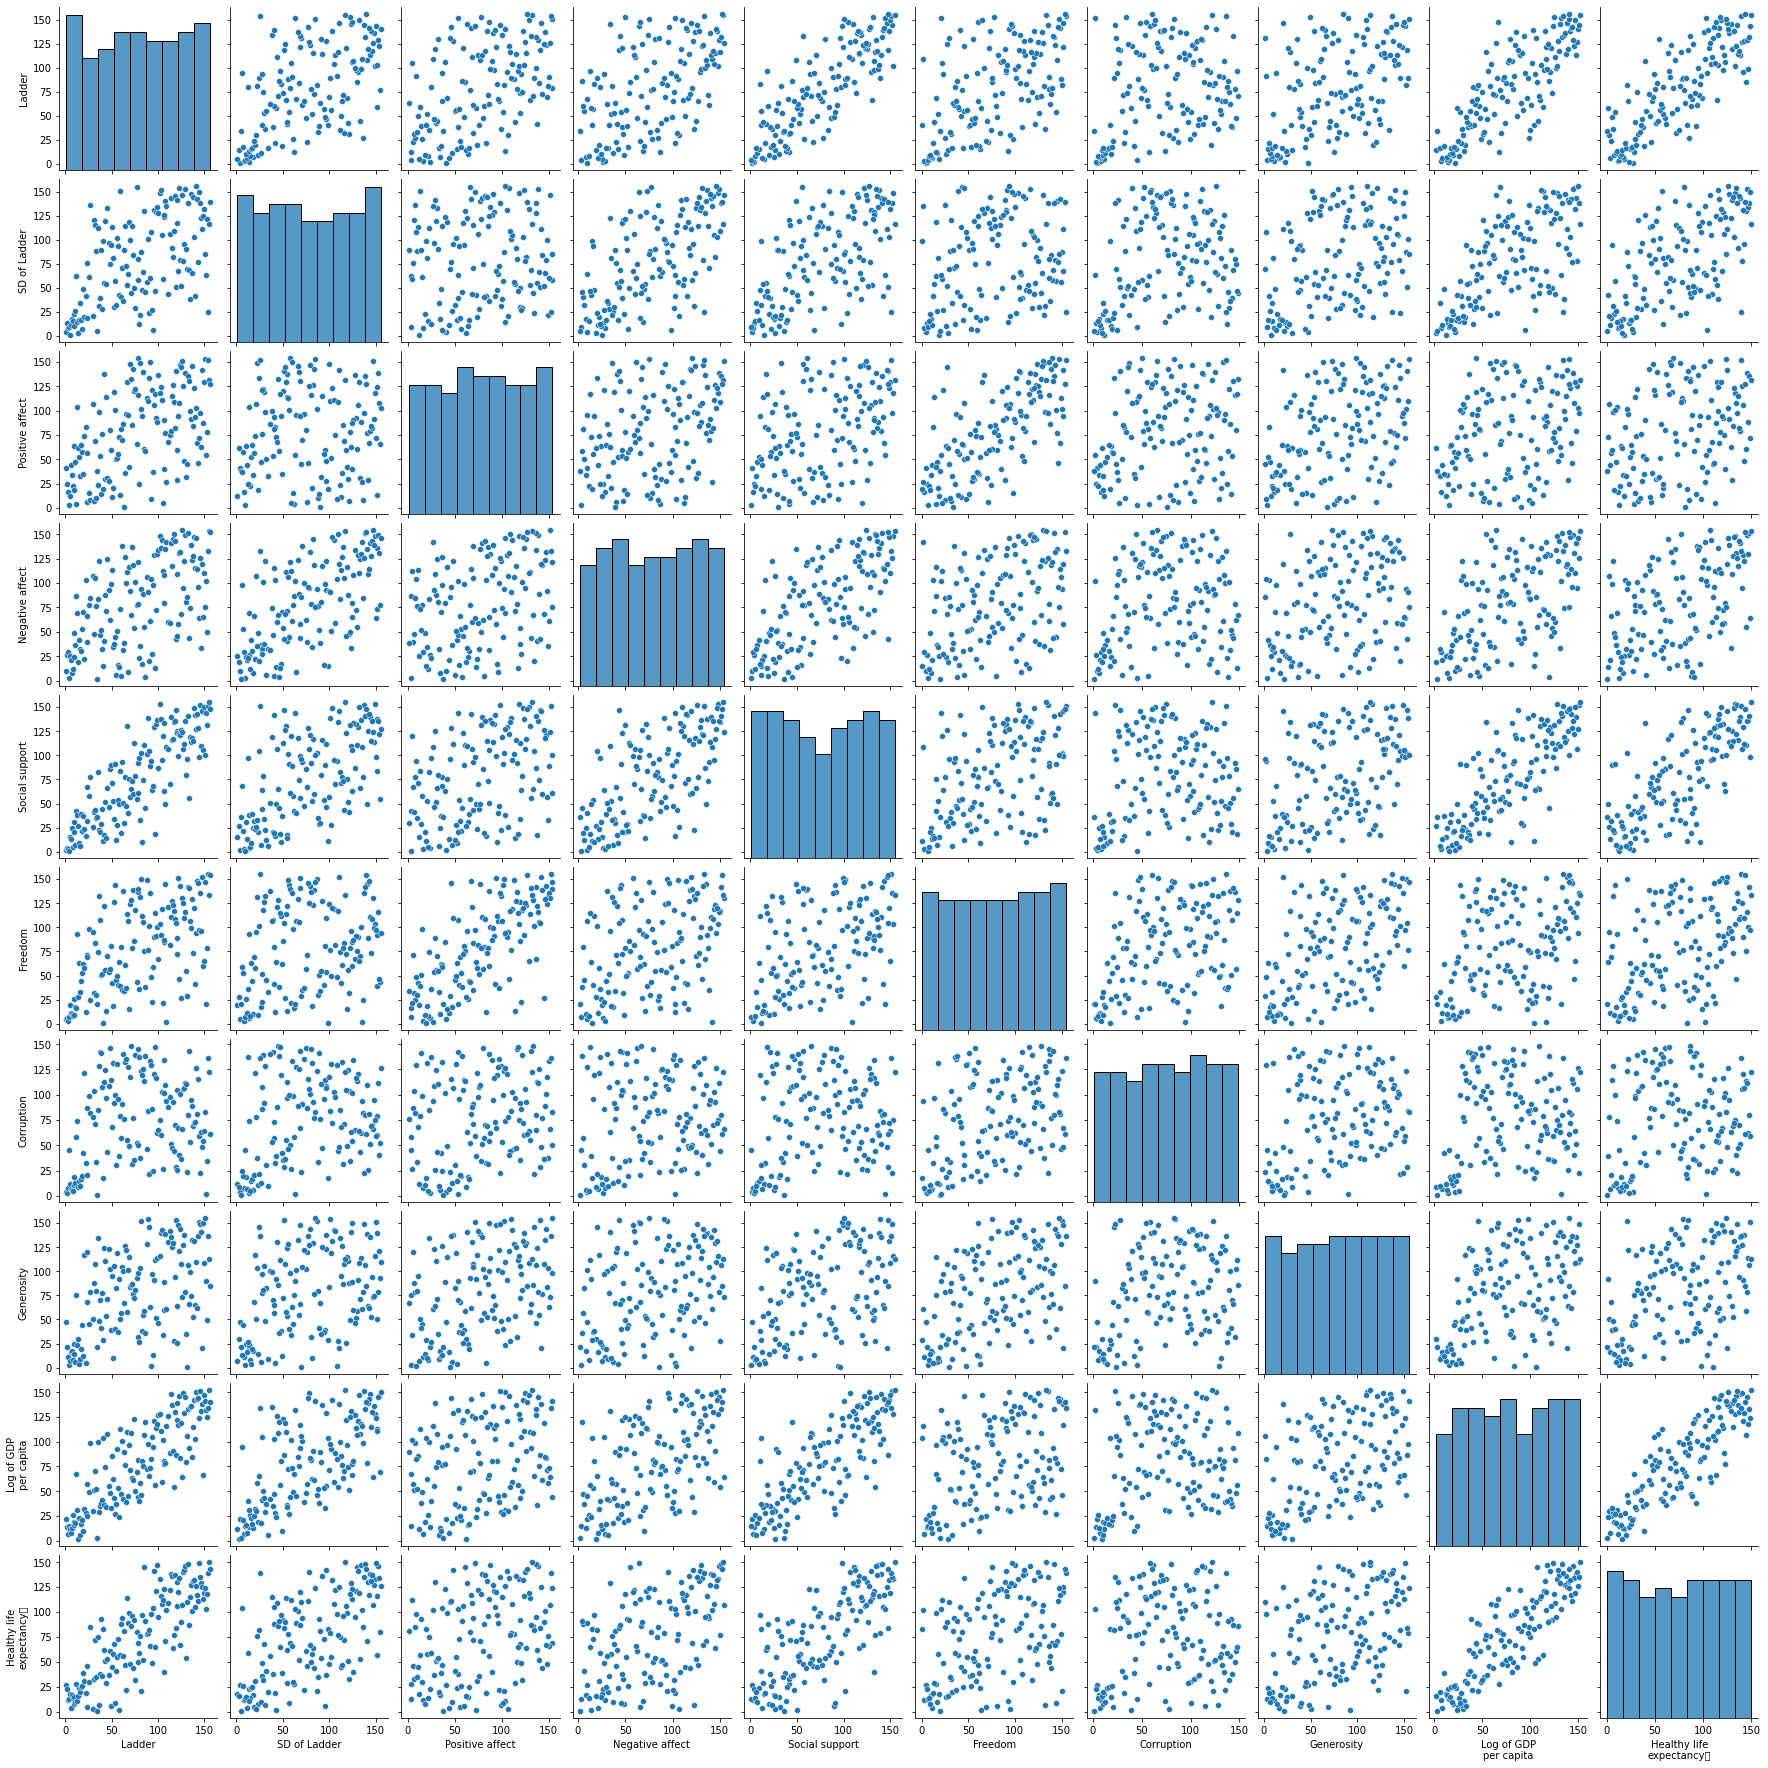

In [43]:
sns.pairplot(data_frame)
plt.show

Finding Correlations

In [44]:
corr = data_frame.corr()
corr.style.background_gradient(cmap='coolwarm')

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000000,0.555987,0.511870,0.539677,0.833412,0.546414,0.224394,0.485704,0.820608,0.826677
SD of Ladder,0.555987,1.000000,0.090332,0.632734,0.600087,0.250246,0.253344,0.386337,0.663977,0.637554
Positive affect,0.511870,0.090332,1.000000,0.351906,0.433333,0.696567,0.225905,0.417061,0.310843,0.339032
Negative affect,0.539677,0.632734,0.351906,1.000000,0.671387,0.415935,0.166472,0.350541,0.565756,0.507148
Social support,0.833412,0.600087,0.433333,0.671387,1.000000,0.478613,0.148890,0.448135,0.801898,0.755292
Freedom,0.546414,0.250246,0.696567,0.415935,0.478613,1.000000,0.407571,0.498226,0.385919,0.423949
Corruption,0.224394,0.253344,0.225905,0.166472,0.148890,0.407571,1.000000,0.281146,0.186140,0.148973
Generosity,0.485704,0.386337,0.417061,0.350541,0.448135,0.498226,0.281146,1.000000,0.459762,0.453135
Log of GDP per capita,0.820608,0.663977,0.310843,0.565756,0.801898,0.385919,0.186140,0.459762,1.000000,0.873628
Healthy life expectancy,0.826677,0.637554,0.339032,0.507148,0.755292,0.423949,0.148973,0.453135,0.873628,1.000000


Found 4 correlations - look at shade of the color

Healthy Life Expectancy and Log of GDP per capita 

Social Support and Log of GDP per capita

Social Support and Healthy life expectancy

Freedom and Positive affect

<AxesSubplot:xlabel='Log of GDP\nper capita', ylabel='Density'>

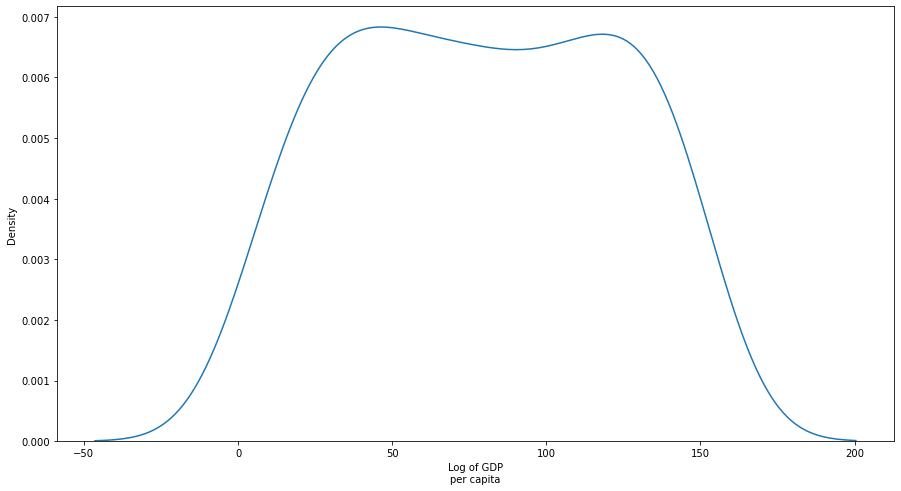

In [45]:
plt.figure(figsize=(15,8))
sns.kdeplot(data_frame['Log of GDP\nper capita'])

Find top and bottom 10

In [46]:
top = data_frame.loc[0:9,'Country (region)']
bot = data_frame.loc[130:140,'Country (region)']
print(top)
print(bot)

0        Finland
1        Denmark
2         Norway
3        Iceland
4    Netherlands
5    Switzerland
6         Sweden
7    New Zealand
8         Canada
9        Austria
Name: Country (region), dtype: object
130     Myanmar
131        Chad
132     Ukraine
133    Ethiopia
135      Uganda
136       Egypt
137      Zambia
138        Togo
139       India
140     Liberia
Name: Country (region), dtype: object


entry #130 is interesting :D

Let's dive deeper into Myanmar

In [47]:

mm = data_frame.loc[130]
print(mm)

Country (region)              Myanmar
Ladder                            131
SD of Ladder                       70
Positive affect                  45.0
Negative affect                  86.0
Social support                   96.0
Freedom                          29.0
Corruption                       24.0
Generosity                        1.0
Log of GDP\nper capita          106.0
Healthy life\nexpectancy\r      110.0
Name: 130, dtype: object


In [48]:
data_frame.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy\r
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,79.157143,78.450000,78.242857,79.157143,77.500000,78.828571,75.700000,78.850000,79.014286,75.478571
std,45.700664,46.121255,44.331627,44.506126,45.815787,45.108972,42.656011,44.727782,43.356310,43.979961
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,40.750000,39.750000,40.750000,40.750000,36.750000,39.750000,39.750000,40.750000,41.750000,36.750000
50%,79.500000,77.500000,78.500000,78.500000,77.500000,79.500000,76.500000,79.500000,78.500000,77.500000
75%,119.250000,119.250000,116.250000,117.250000,118.250000,118.250000,112.250000,116.250000,117.250000,113.250000
max,156.000000,156.000000,154.000000,154.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


Thats it for now.